In [1]:
%reload_ext autoreload
%autoreload 2
from ripple_heterogeneity.utils import loading,functions,add_new_deep_sup
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib

functions.set_plotting_defaults()
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
fig_save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\figures\panels'

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
basepath = "Z:\\Data\\HMC1\\day8"
channel_df, ripple_average, ripple_time_axis = loading.load_deepSuperficialfromRipple(
    basepath, bypass_mismatch_exception=False
)

In [7]:
ripple_average.shape

(512, 301)

In [3]:
channel_df.loc[(channel_df.channelDistance > -30) & (channel_df.channelDistance < 30),"channelClass"] = "middle"
channel_df

,channel,channel_sort_idx,shank,channelDistance,channelClass,polarity_reversal,ripple_power,ripple_amplitude,SWR_diff,SWR_amplitude,ca1_shank,basepath
0,1.0,0.0,1.0,NaN,Cortical,False,1.000000,-0.684720,-1.000000,1.000000,NaN,Z:\Data\HMC1\day8
1,2.0,13.0,1.0,NaN,Cortical,False,0.872877,-0.935926,-0.833856,0.861350,NaN,Z:\Data\HMC1\day8
2,3.0,18.0,1.0,NaN,Cortical,False,0.838486,-0.898434,-0.827913,0.785087,NaN,Z:\Data\HMC1\day8
3,4.0,31.0,1.0,NaN,Cortical,False,0.811195,-0.899314,-0.820005,0.747076,NaN,Z:\Data\HMC1\day8
4,5.0,17.0,1.0,NaN,Cortical,False,0.772673,-0.909483,-0.801754,0.722916,NaN,Z:\Data\HMC1\day8
...,...,...,...,...,...,...,...,...,...,...,...,...
507,508.0,NaN,16.0,NaN,Cortical,False,0.825081,-0.970433,-0.859888,0.858005,NaN,Z:\Data\HMC1\day8
508,509.0,NaN,16.0,NaN,Cortical,False,0.812630,-0.950280,-0.857313,0.857229,NaN,Z:\Data\HMC1\day8
509,510.0,NaN,16.0,NaN,Cortical,False,0.817396,-0.944473,-0.866180,0.869572,NaN,Z:\Data\HMC1\day8
510,511.0,NaN,16.0,NaN,Cortical,False,0.810499,-0.952954,-0.860796,0.854216,NaN,Z:\Data\HMC1\day8


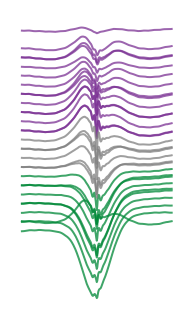

In [49]:
group_colors = {
    "Deep": "#7b3294",
    "Superficial": "#008837",
    "middle": "grey"
}
fig = plt.figure(
    figsize=functions.set_size("thesis", fraction=.25, subplots=(3, 1)), edgecolor=None
)
offset = channel_df.channelDistance[(channel_df.shank == 9) & (channel_df.channelClass=="Deep")].values *-.01
plt.plot(
    ripple_average[(channel_df.shank == 9) & (channel_df.channelClass=="Deep")].T + offset,
    color=group_colors["Deep"],
    alpha=.75,linewidth=1
)

offset = channel_df.channelDistance[(channel_df.shank == 9) & (channel_df.channelClass=="Superficial")].values *-.01
plt.plot(
    ripple_average[(channel_df.shank == 9) & (channel_df.channelClass=="Superficial")].T + offset,
    color=group_colors["Superficial"],
    alpha=.75,linewidth=1
)

offset = channel_df.channelDistance[(channel_df.shank == 9) & (channel_df.channelClass=="middle")].values *-.01
plt.plot(
    ripple_average[(channel_df.shank == 9) & (channel_df.channelClass=="middle")].T + offset,
    color=group_colors["middle"],
    alpha=.75,linewidth=1
)
plt.axis("off")

plt.savefig(
    os.path.join(fig_save_path, "average_ripple_trace_deep_middle_sup.svg"),
    dpi=300,
    bbox_inches="tight",
)

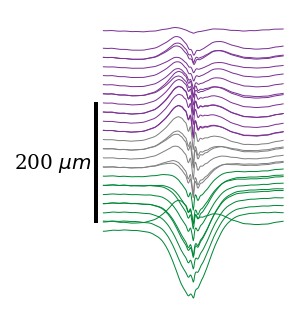

In [6]:
from ripple_heterogeneity.utils import scalebars

group_colors = {
    "Deep": "#7b3294",
    "Superficial": "#008837",
    "middle": "grey"
}
fig = plt.figure(
    figsize=functions.set_size("thesis", fraction=.3, subplots=(2.5, 1)), edgecolor=None
)
offset = channel_df.channelDistance[(channel_df.shank == 9) & (channel_df.channelClass=="Deep")].values
plt.plot(
    ripple_average[(channel_df.shank == 9) & (channel_df.channelClass=="Deep")].T*100 + offset*-1,
    color=group_colors["Deep"],
    alpha=1,linewidth=.5
)

offset = channel_df.channelDistance[(channel_df.shank == 9) & (channel_df.channelClass=="Superficial")].values
plt.plot(
    ripple_average[(channel_df.shank == 9) & (channel_df.channelClass=="Superficial")].T*100 + offset*-1,
    color=group_colors["Superficial"],
    alpha=1,linewidth=.5
)

offset = channel_df.channelDistance[(channel_df.shank == 9) & (channel_df.channelClass=="middle")].values
plt.plot(
    ripple_average[(channel_df.shank == 9) & (channel_df.channelClass=="middle")].T*100 + offset*-1,
    color=group_colors["middle"],
    alpha=1,linewidth=.5
)
# plt.axis("off")

scalebars.add_scalebar(
    plt.gca(),
    matchx=False,
    matchy=False,
    hidex=True,
    hidey=True,
    pad=0,
    loc=6,
    sizey=200,
    barwidth=2,
    borderpad=-5,
    labely="200 $\mu m$",
)
plt.savefig(
    os.path.join(fig_save_path, "average_ripple_trace_deep_middle_sup_v2.svg"),
    dpi=300,
    bbox_inches="tight",
)